In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('to_csv_all/to_csv/train/train_병합/train_3_매출정보.csv')

In [3]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

In [4]:
def plot_and_count_zero(df, column_name):
    # 고유값 정렬
    order = sorted(df[column_name].unique())
    
    # 카운트플롯
    ax = sns.countplot(data=df, x=column_name, hue=column_name, order=order)
    annotate_countplot(ax)
    plt.show()
    
    # 최빈값과 개수 구하기
    value_counts = df[column_name].value_counts()

    most_common_value = value_counts.index[0]
    most_common_count = value_counts.iloc[0]
    total = len(df)

    print(f"최빈값: {most_common_value}")
    print(f"개수: {most_common_count} ({most_common_count / total:.2%})")

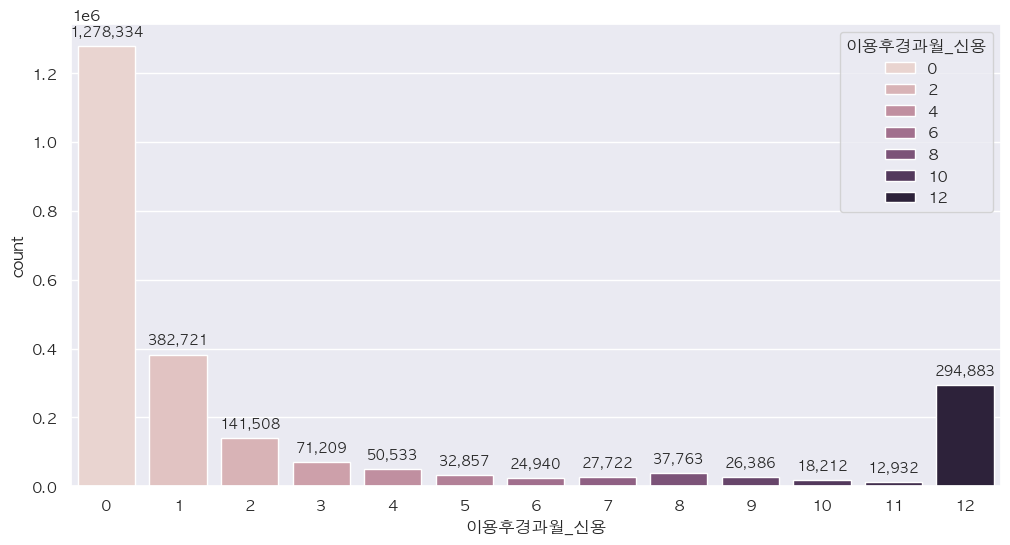

최빈값: 0
개수: 1278334 (53.26%)


In [5]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_신용')

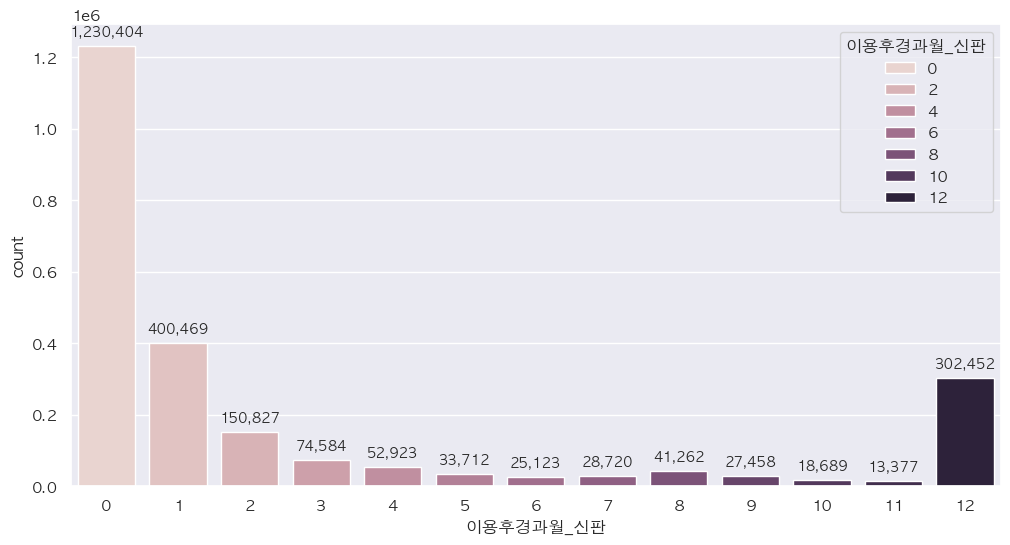

최빈값: 0
개수: 1230404 (51.27%)


In [6]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_신판')

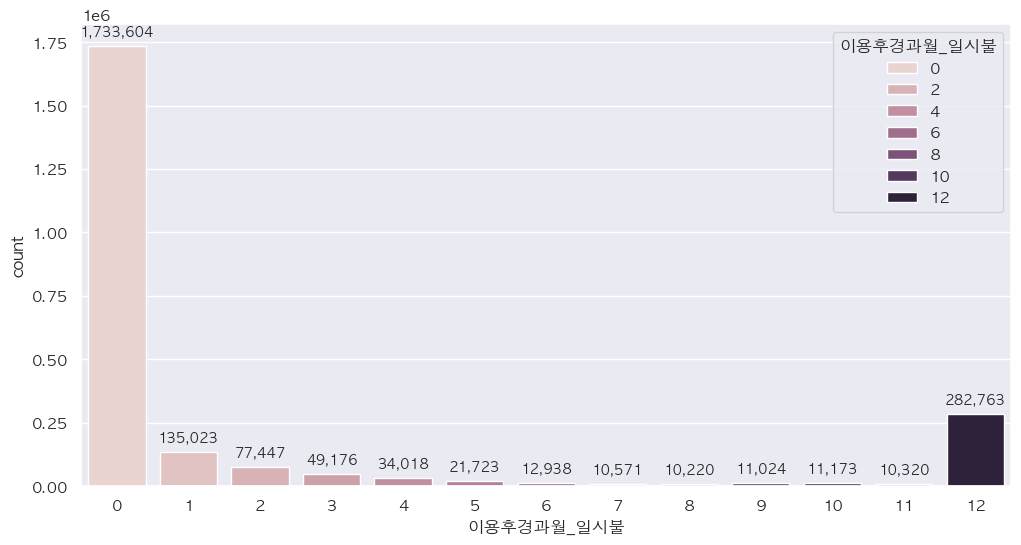

최빈값: 0
개수: 1733604 (72.23%)


In [7]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_일시불')

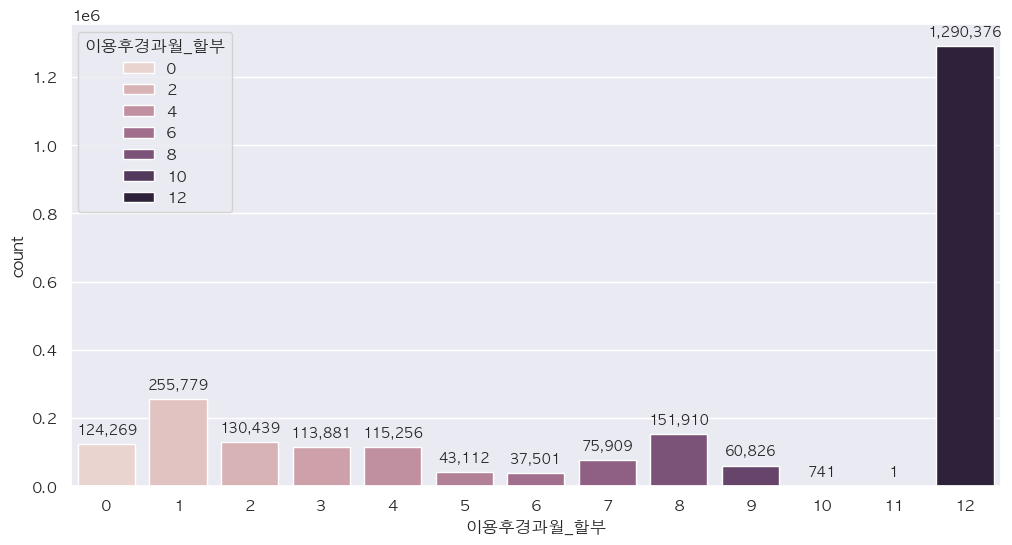

최빈값: 12
개수: 1290376 (53.77%)


In [8]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_할부')

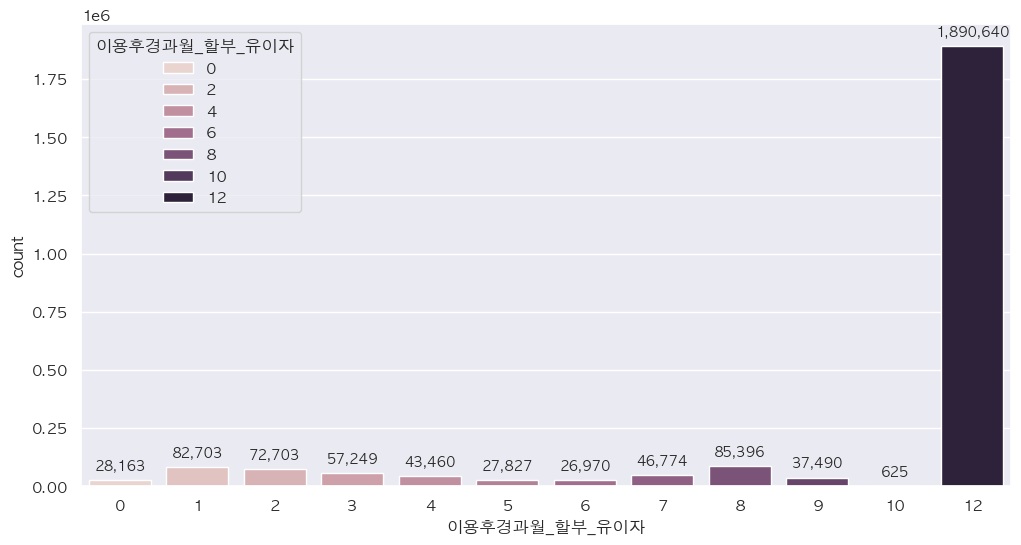

최빈값: 12
개수: 1890640 (78.78%)


In [9]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_할부_유이자')

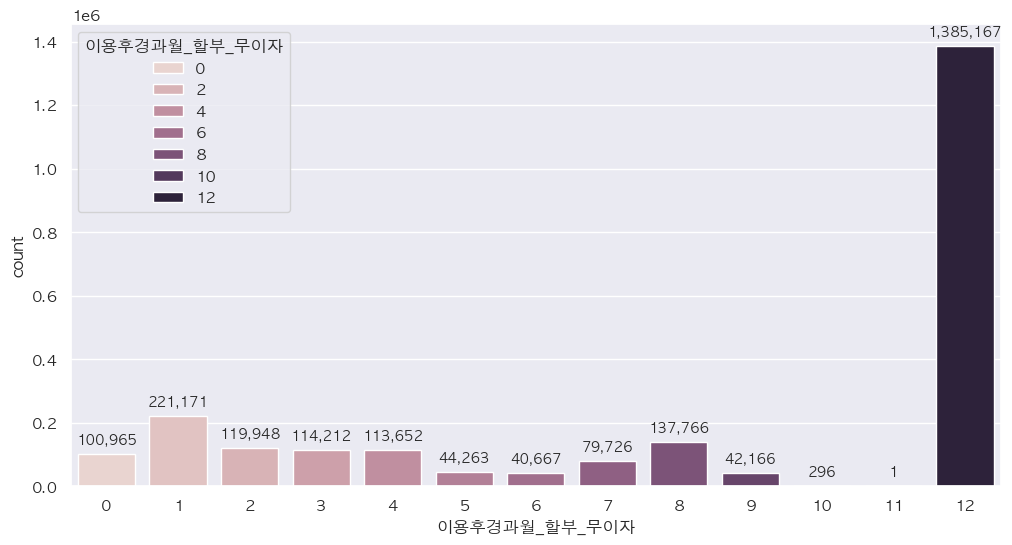

최빈값: 12
개수: 1385167 (57.72%)


In [10]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_할부_무이자')

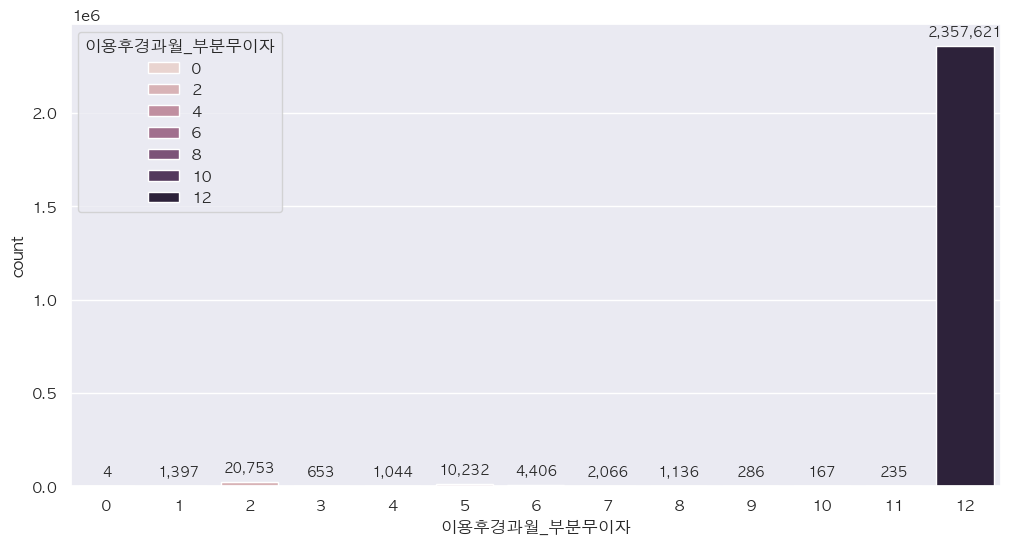

최빈값: 12
개수: 2357621 (98.23%)


In [11]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_부분무이자')

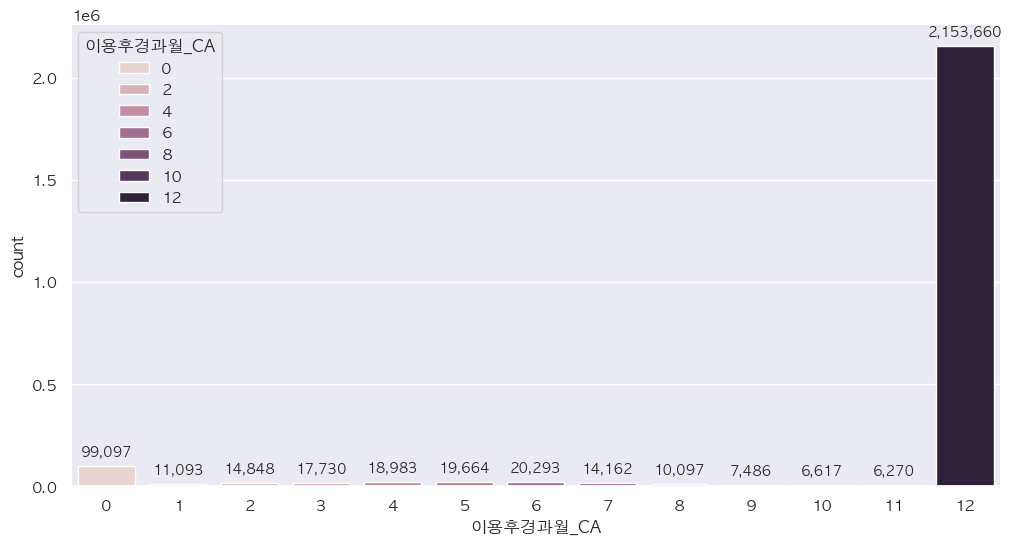

최빈값: 12
개수: 2153660 (89.74%)


In [12]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_CA')

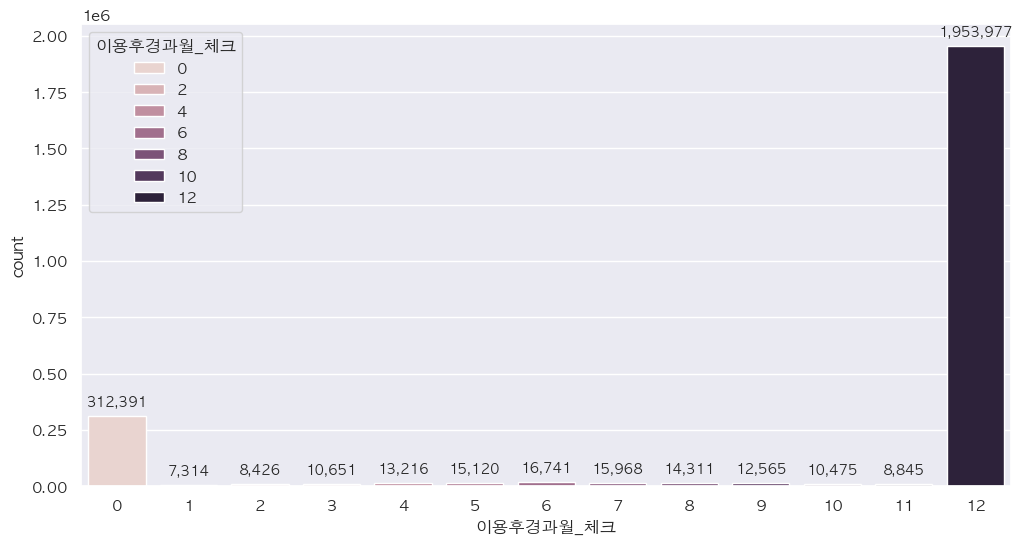

최빈값: 12
개수: 1953977 (81.42%)


In [13]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_체크')

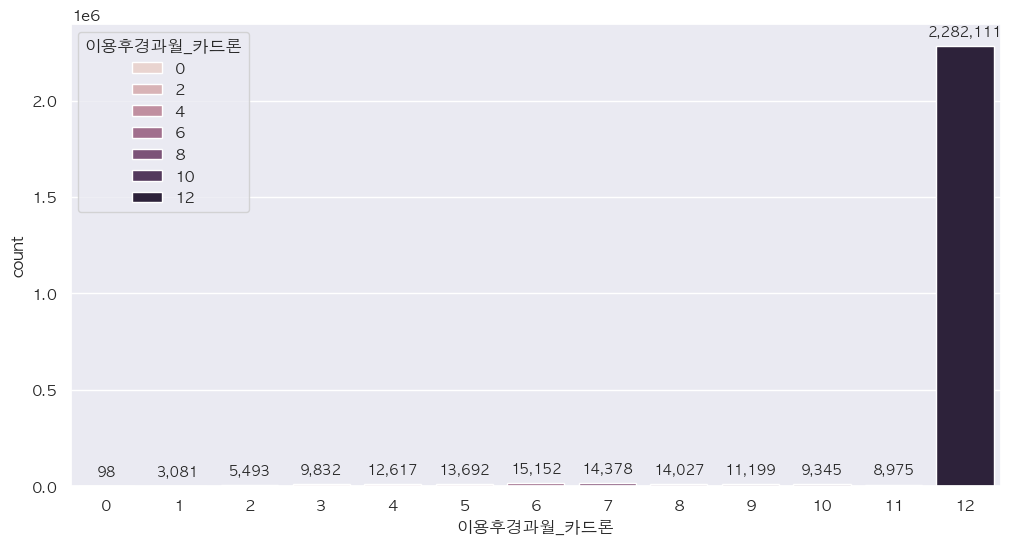

최빈값: 12
개수: 2282111 (95.09%)


In [14]:
# 비율 확인하기
plot_and_count_zero(df1, '이용후경과월_카드론')

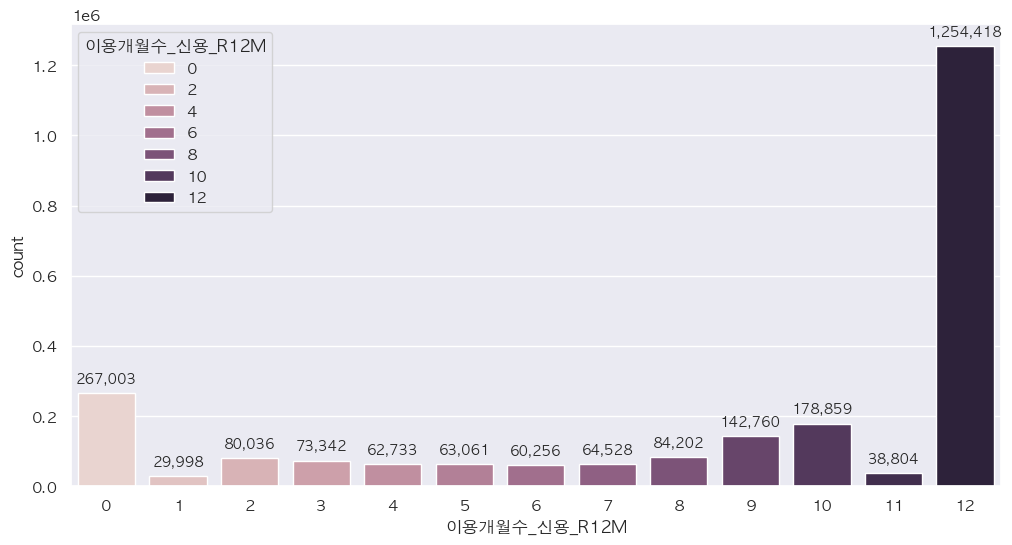

최빈값: 12
개수: 1254418 (52.27%)


In [15]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_신용_R12M')

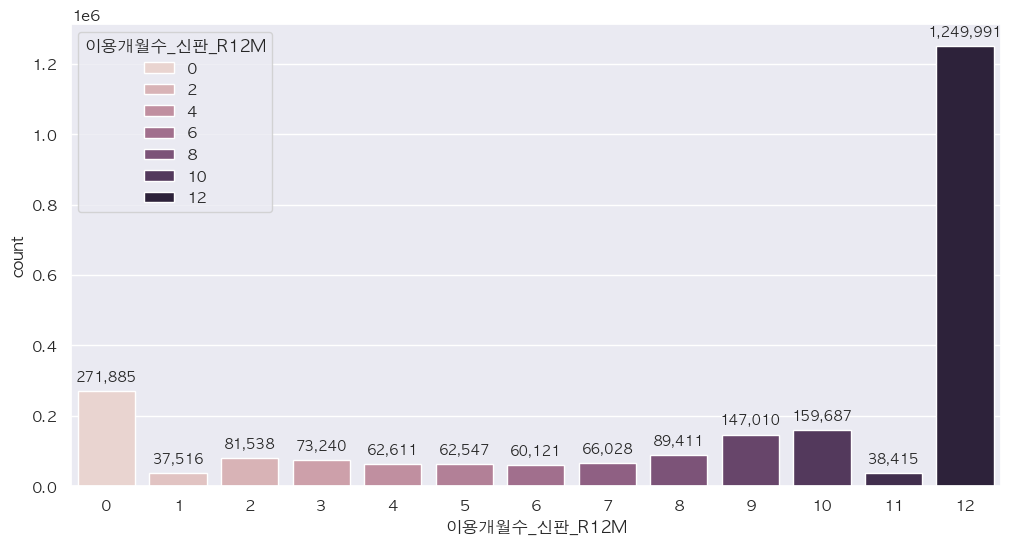

최빈값: 12
개수: 1249991 (52.08%)


In [16]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_신판_R12M')

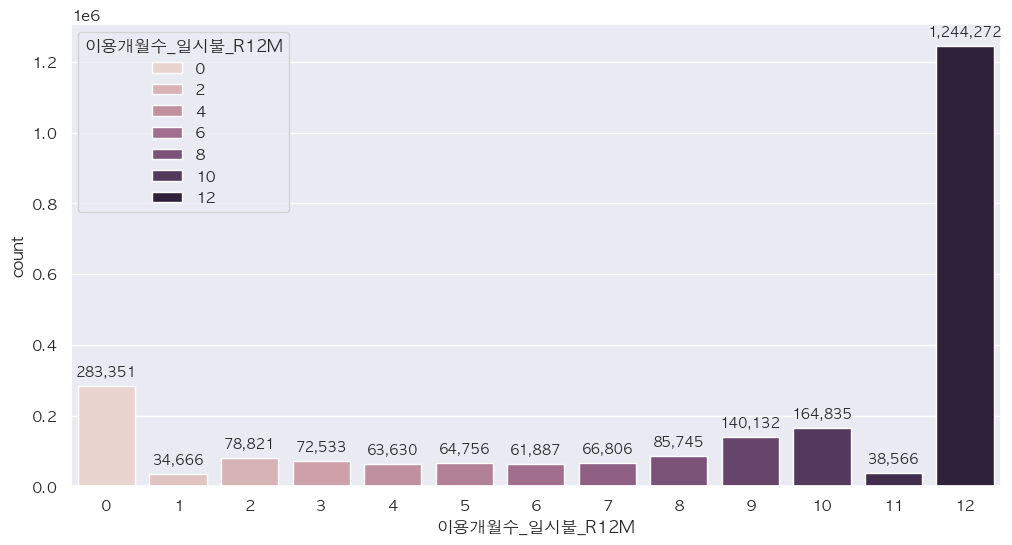

최빈값: 12
개수: 1244272 (51.84%)


In [17]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_일시불_R12M')

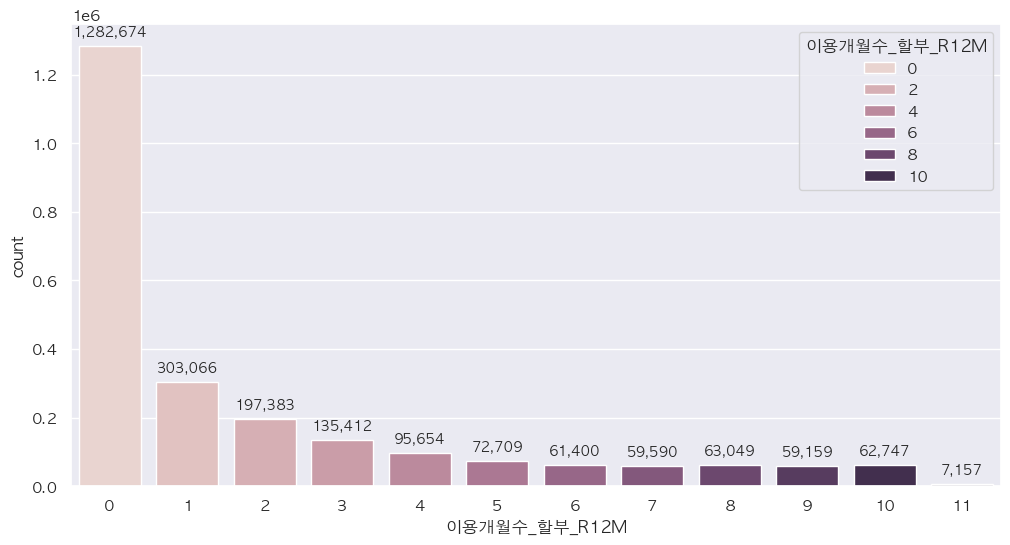

최빈값: 0
개수: 1282674 (53.44%)


In [18]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_R12M')

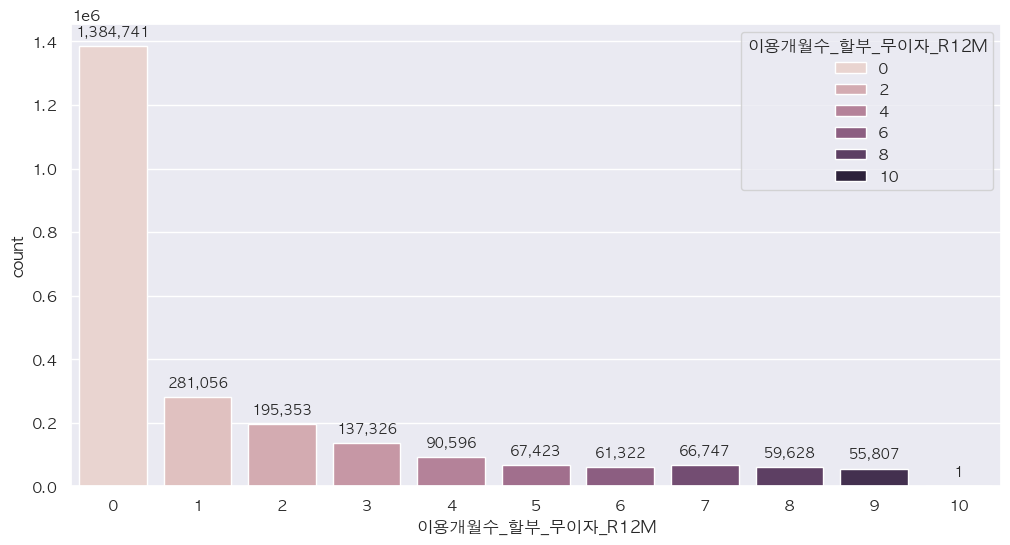

최빈값: 0
개수: 1384741 (57.70%)


In [19]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_무이자_R12M')

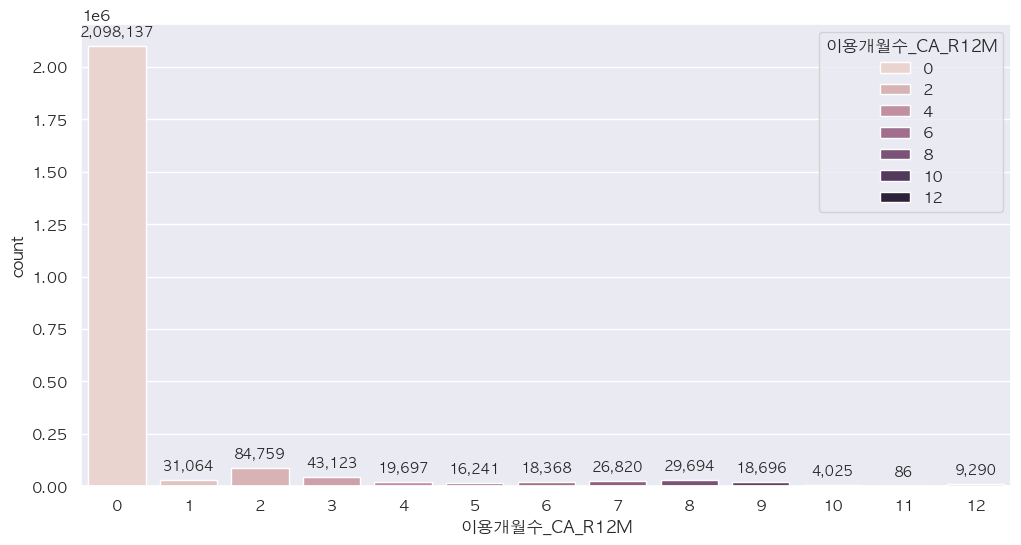

최빈값: 0
개수: 2098137 (87.42%)


In [20]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_CA_R12M')

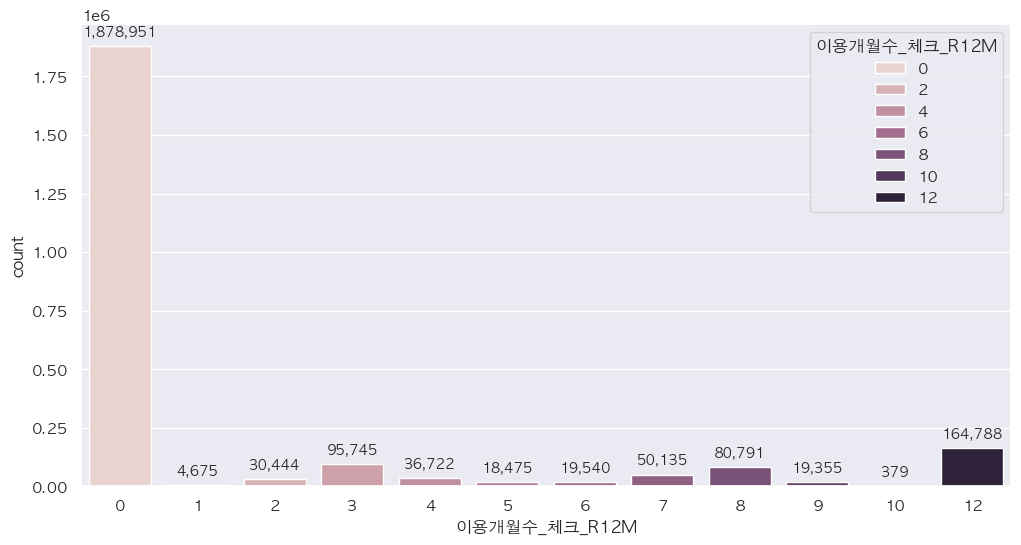

최빈값: 0
개수: 1878951 (78.29%)


In [21]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_체크_R12M')

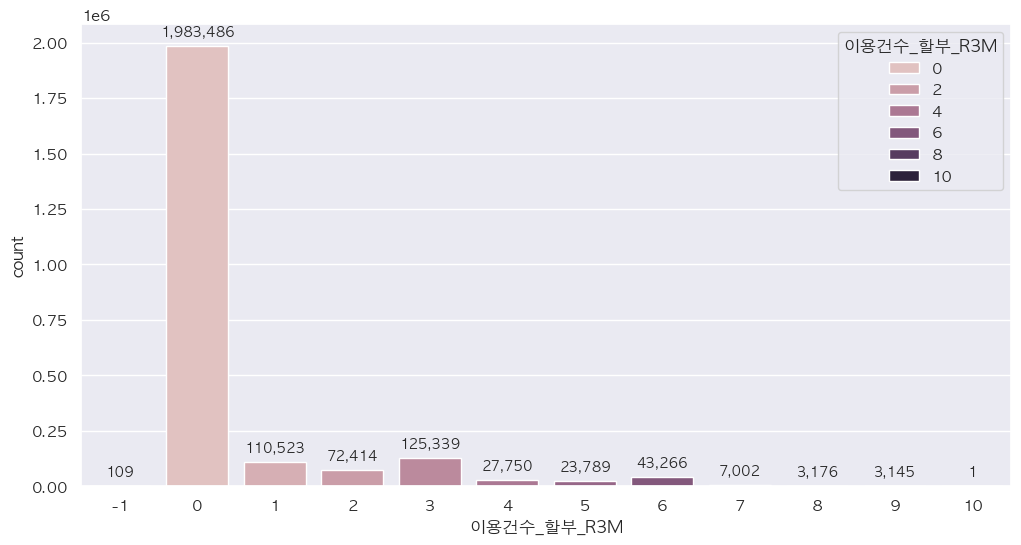

최빈값: 0
개수: 1983486 (82.65%)


In [22]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_할부_R3M')

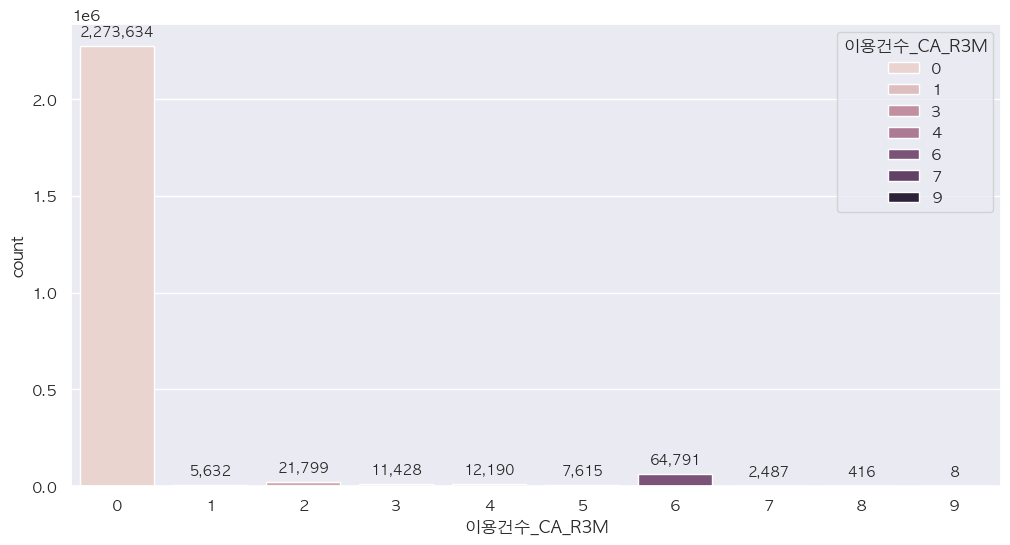

최빈값: 0
개수: 2273634 (94.73%)


In [23]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_CA_R3M')

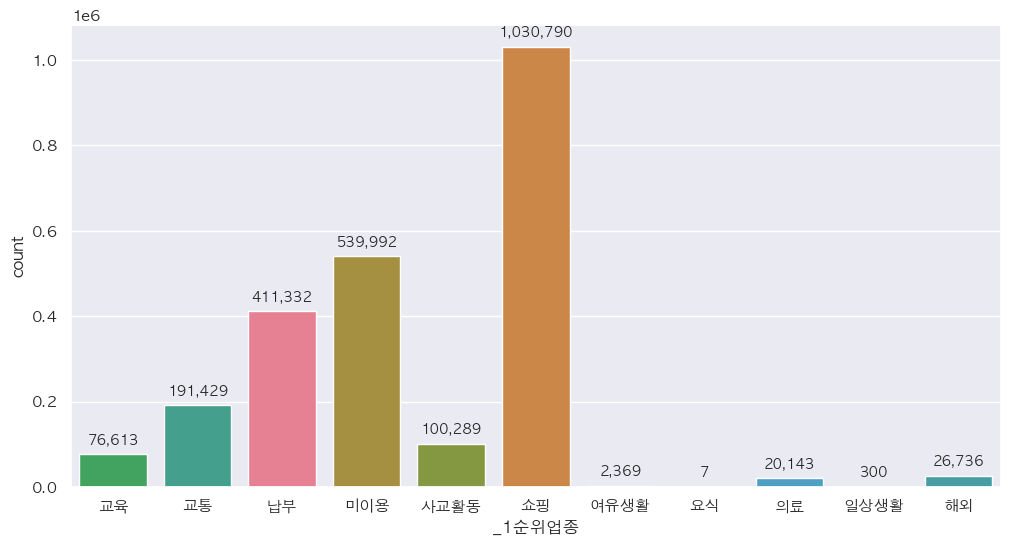

최빈값: 쇼핑
개수: 1030790 (42.95%)


In [24]:
# 비율 확인하기
plot_and_count_zero(df1, '_1순위업종')

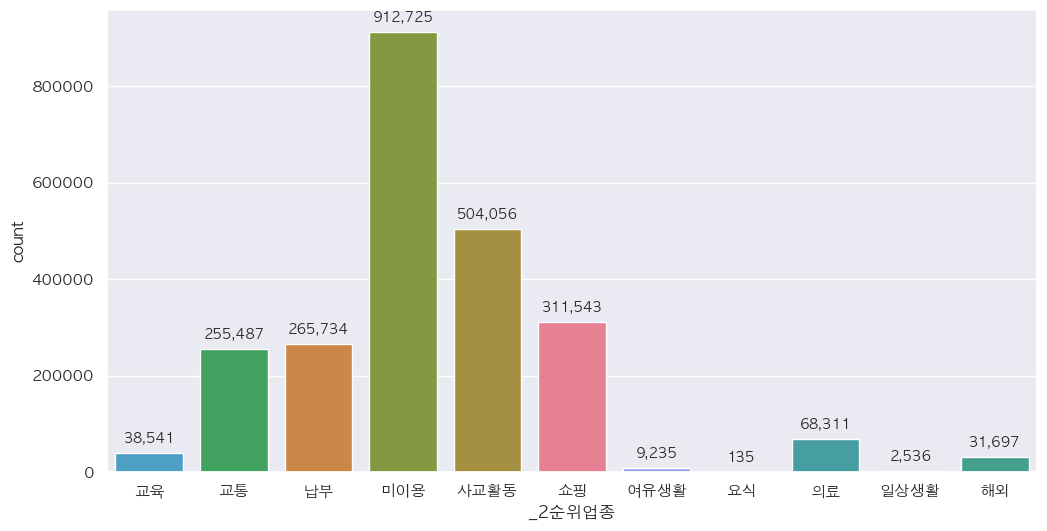

최빈값: 미이용
개수: 912725 (38.03%)


In [25]:
# 비율 확인하기
plot_and_count_zero(df1, '_2순위업종')

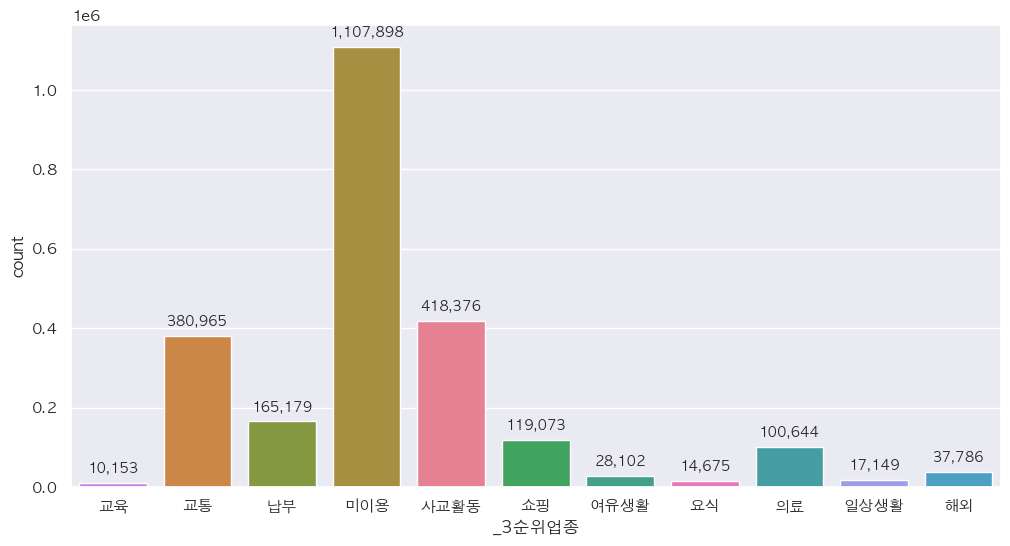

최빈값: 미이용
개수: 1107898 (46.16%)


In [26]:
# 비율 확인하기
plot_and_count_zero(df1, '_3순위업종')

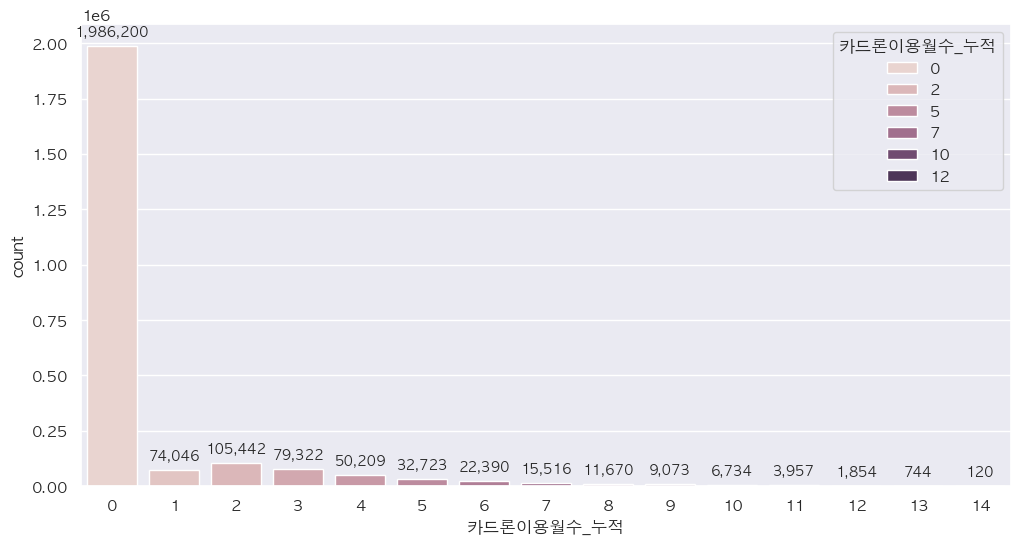

최빈값: 0
개수: 1986200 (82.76%)


In [27]:
# 비율 확인하기
plot_and_count_zero(df1, '카드론이용월수_누적')

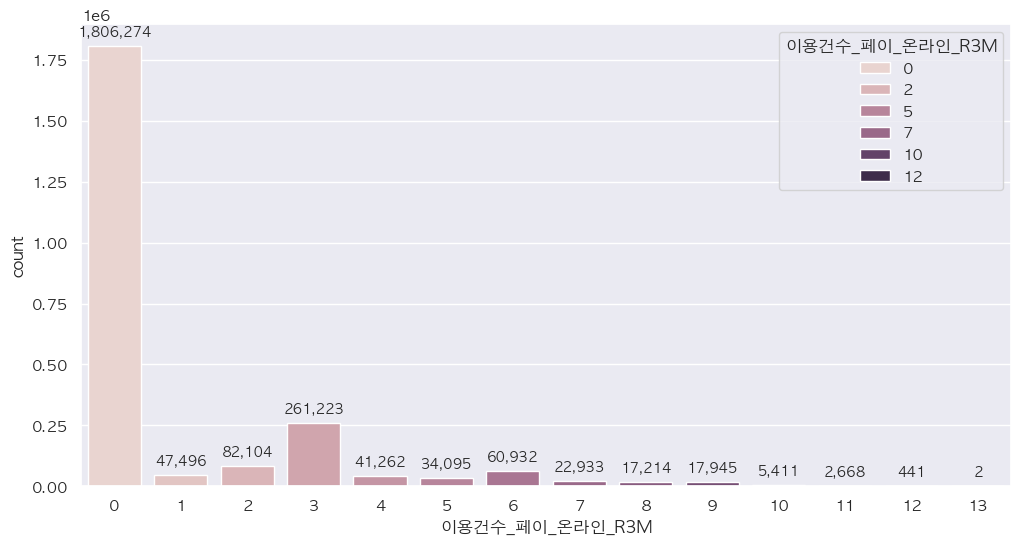

최빈값: 0
개수: 1806274 (75.26%)


In [28]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_페이_온라인_R3M')

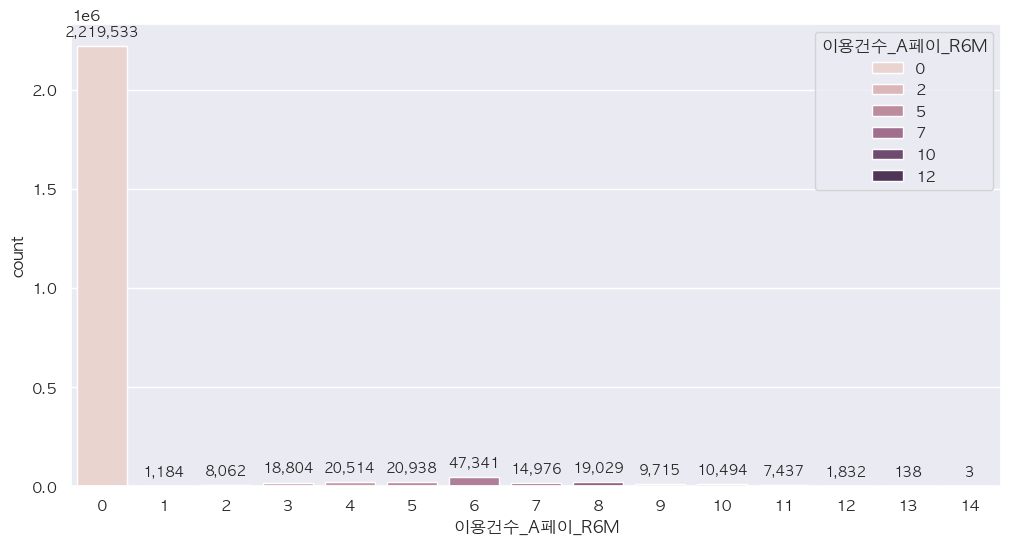

최빈값: 0
개수: 2219533 (92.48%)


In [29]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_A페이_R6M')

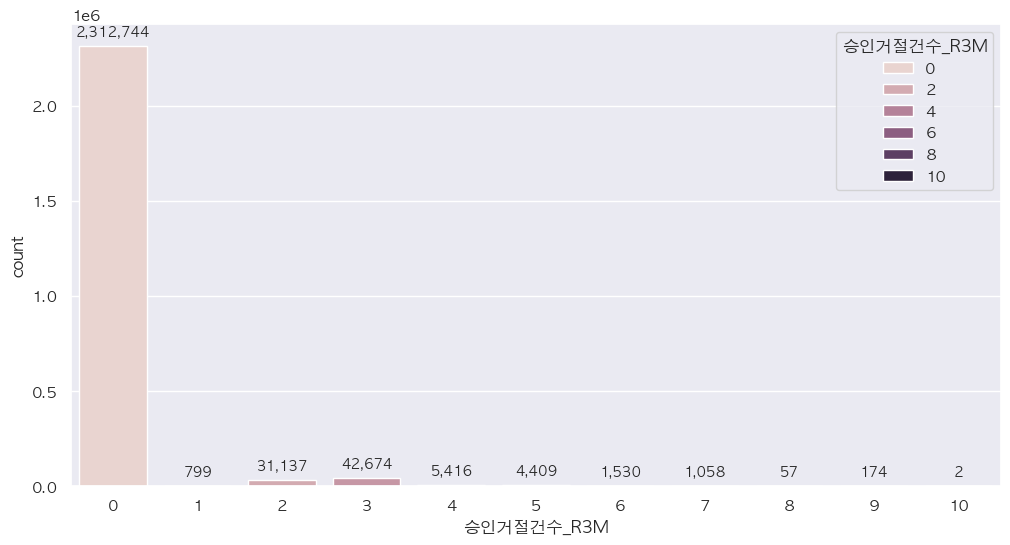

최빈값: 0
개수: 2312744 (96.36%)


In [30]:
# 비율 확인하기
plot_and_count_zero(df1, '승인거절건수_R3M')